# HTTP
- HTTP 통해서 통신하는 순간 HTML을 사용하기 때문에 HTML을 파싱할 수 있어야 한다.
- TCP/IP 통신이므로 통신 동안은 반드시 연결 되어있다.
- request
    - 브라우저가 자동으로 붙여주는 것이 많다.
    - header를 열어 확인해야 한다.
    - user-agent 통해서 사용자의 브라우저를 확인하여 정상적인 사용자인지 확인한다.
    - text/html, \*/\*
    - BODY는 post 방식에서 볼 것이다.
    - get은 글자만 보내야 하고, 길이 제한이 있다.
    - post 방식은 묶어서 body에 넣어서 보낸다. 길이 제한이 없다.

## Crawling/ Scrapping

- Opt-in : 정보 수집을 명시적으로 동의 할 때에만 정보수집 가능; whitelist
- Opt-out : 정보 수집을 명시적으로 거부할 때에만 정보수집 중단; blacklist
    - 전세계적으로 합법이다.
    - 상대방이 명시적으로 거부 의사를 밝혔는가가 중요하다.
    - 합법 : 검색엔진, 가격비교 등 (공익을 목적으로하기 때문에)
    - 위법 : 사이트 운영자의 의사에 반하지 않으면 합법
        - 나 대신 봇이 로그인을 하여 정보를 모아오는 경우
        - 여러번씩 request를 날릴 수 있다. -> 1000번 10000번이 될 수 있다. 한정된 트래픽 안에서 봇이 너무 많이 차지해서 정상적인 이용자가 이용을 못하기 때문에 불법이 된다. -> 일정한 텀을 두거나 request를 제한해야한다.
        - 지적재산권 : 소유물, 창작물로 인정을 받기 때문에 막 이용하면 안된다.
        - 이용방침 : 사이트에서 사용하지 말라는 것을 사용하면 안된다. 약관을 확인해야한다.

1. url/robots.txt
    - Crawler와 같은 bot 접근을 제어하기 위한 규약.
    - 대상 봇, 수집 여부, 수집 범위 등 기술
2. Crawl delay
    - 사이트에 최대한 부담 지양
3. Term of use 
    - 사이트 이용방침(약관) 준수
4. Public content
    - 지적재산권 침해 여부 주의
5. Authentication-based sites
    - 민감한 정보 수집 주의

In [1]:
! pip install builtwith

  Stored in directory: C:\Users\재은\AppData\Local\pip\Cache\wheels\2b\00\c2\a96241e7fe520e75093898bf926764a924873e0304f10b2524
Successfully built builtwith


In [2]:
from builtwith import builtwith

In [3]:
builtwith('http://wordpress.com')

{'web-servers': ['Nginx'],
 'font-scripts': ['Google Font API'],
 'ecommerce': ['WooCommerce'],
 'cms': ['WordPress'],
 'programming-languages': ['PHP'],
 'blogs': ['PHP', 'WordPress']}

whois

## urllib
- HTTP라는 객체를 감싸고 있는 단계 
- REQUEST의 하위 레벨.
- 중간에 있기 때문에 컨트롤 해야 한다.
- urllib.request     : opening and reading URLs : 전체 주소이기 때문에 파싱을 통해 URL만들어줘야한다.
- urllib.error       : Containing the exceptions raised by urllib.request
- urllib.parse       : Parsing URLs
- urllib.robotparser : Parsing robots.txt files : 읽을 수 있는지 없는지 알려준다. 정확히 잘 안 돈다. 직접 코드를 통해 확인할 수 있다. :으로 split해서 확인. 또는 정규식 사용
- urllib.response    : Used ineternally by the urllib.request module

robotparser
- 우리 agent가 긁을 수 있는지 없는지 robots.txt를 확인하여 True/False로 알려준다.


In [1]:
from urllib import robotparser

In [12]:
robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()
robot.can_fetch("Yeti", "/main/imagemontage")

True

In [13]:
robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()
robot.can_fetch("*", "/main/imagemontage")

False

request 
- urlopen url을 string형태로 넣어준다. 

In [2]:
from urllib import request
###from urllib import request는 ver1이라 하위버전이고
###import requests가 ver2로 상위에 있음. 어지간하면 import requests 사용하라고 조교님이 덧붙여 주셨음

# response 객체를 받아온다
resp = request.urlopen("https://www.google.com")
# 받아온 url 뿌려준다
resp.geturl()
# 성공적으로 받아왔는지, 요청을 못찾았는지 등 코드와 이유를 알려준다.
resp.getcode()
print(resp.info())

# 상대방 서버에서 응답한 header
resp.getheaders()

Date: Thu, 11 Jul 2019 04:17:16 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=ISO-8859-1
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-07-11-04; expires=Sat, 10-Aug-2019 04:17:16 GMT; path=/; domain=.google.com
Set-Cookie: NID=187=jwNVVmmHNCGd4im1dyU-HjY9rSSPSt3yFOOZW7qdcm9R9RnyT78L1BINAlmMWlROqyF0VKrOSSojYDQezRFBdVFpkyLY1ql7VRPSiKP5eYVeFXB5z8zFgBZlbO1qQAOcdU91V3dpVYYF70lFtI8fBAoB0fmN_6FMExc6hEmnH-A; expires=Fri, 10-Jan-2020 04:17:16 GMT; path=/; domain=.google.com; HttpOnly
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




[('Date', 'Thu, 11 Jul 2019 04:17:16 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-07-11-04; expires=Sat, 10-Aug-2019 04:17:16 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=187=jwNVVmmHNCGd4im1dyU-HjY9rSSPSt3yFOOZW7qdcm9R9RnyT78L1BINAlmMWlROqyF0VKrOSSojYDQezRFBdVFpkyLY1ql7VRPSiKP5eYVeFXB5z8zFgBZlbO1qQAOcdU91V3dpVYYF70lFtI8fBAoB0fmN_6FMExc6hEmnH-A; expires=Fri, 10-Jan-2020 04:17:16 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'quic=":443"; ma=2592000; v="46,43,39"'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

In [16]:
print(resp.status)
print(resp.reason)
resp.info()

200
OK


https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81
    source=hp
    ei=ZpsmXeWxA87S8wXVwYuICg
    q=%EB%B0%95%EB%B3%B4%EC%98%81
    oq=%EB%B0%95%EB%B3%B4%EC%98%81
    gs_l=psy-ab.3..0l10.397549.400131..400761...1.0..0.143.934.6j3......0....1..gws-wiz.....0..0i10j0i131.meHsnJHPFXU

403 error: 요청을 잘못해서 일때, 내가 접근 권한이 없을 때 발생

정상적인 agent가 없으므로 search는 막혀있으니 막힌다.

In [269]:
resp = request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
resp.code, resp.reason

HTTPError: HTTP Error 403: Forbidden

status code 
- 200대 Success, 400대 Client error, 500대 Server error를 알아야한다.
- 이용하여 코드 상태에 따라 분기하여 처리

In [19]:
from urllib import error

try:
    resp = request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

403 Forbidden Content-Type: text/html; charset=UTF-8
Date: Thu, 11 Jul 2019 02:33:48 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




header에 값을 심어서 bot인 것을 숨긴다.
- user-agent
    - 수집을 위해서는 가장 기초가 된다.
    - urlopen 으로는 넣을 수 없으니 Request객체를 생성해야한다.

In [16]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
from urllib import error

try:
    req = request.Request("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81", headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

In [33]:
print(resp.code, resp.status, resp.reason, req.headers)

200 200 OK {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}


결과를 보고싶으면 resp.read()해주면된다.

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>\xeb\xb0\x95\xeb\xb3\xb4\xec\x98\x81 - Google \xea\xb2\x80\xec\x83\x89</title><script nonce="717GbMKVofoZVdKRis5dxQ==">(function(){window.google={kEI:\'UrcmXYjkOIzLmAWOsIewBw\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_UrcmXYjkOIzLmAWOsIewBw\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=goo
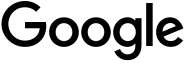
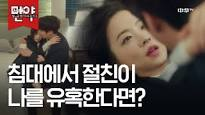
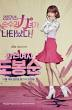
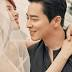

In [34]:
resp.read()

통신할 때는 무조건 바이트이어야하므로 한글이 들어가면 유니코드 엔코드 에러 발생
- urlparse를 이용한다.

In [15]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
from urllib import error

try:
    req = request.Request("https://www.google.com/search?q='박보영'", headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 15-17: ordinal not in range(128)

urljoin을 사용해서 호스트부분을 놔두고 뒷부분을 싹 바꿔준다.

In [35]:
from urllib import parse

parse.urlparse("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
parse.urljoin("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81", "/search/about")
parse.urlencode({'q':'파이썬'})
# 띄어쓰기가 나오면 + 기호로 표현
parse.quote_plus('파 이 썬')
# parse.unquote_plus("%EB%B0%95%EB%B3%B4%EC%98%81")

'%ED%8C%8C+%EC%9D%B4+%EC%8D%AC'

In [ ]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
# 파라미터를 따로 만들어서 data부분에 request로 넘겨준다.
param = {}
from urllib import error

try:
    req = request.Request("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81",param, headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

## REQUESTS 패키지 사용
- urllib보다 상위레벨의 패키지
- 장점
    - CRUD(RESTful) 방식 으로 사용할 수 있다.
    - 사용 방법이 심플하다.
    
- [request, response test site](http://httpbin.org/)

In [9]:
import requests

url을 그냥 주면 된다. 한글을 넣어도 알아서 변환해준다.

In [ ]:
requests.get()

기존에는 한 번 읽으면 날라갔지만 requests 사용하면 여러번 사용할 수 있다.

In [10]:
resp = requests.request("get", "http://httpbin.org/get", params={"key":"value"})

In [11]:
print(resp.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "origin": "163.152.3.140, 163.152.3.140", 
  "url": "https://httpbin.org/get?key=value"
}



post 방식은 파라미터가 아니라 data 라고 넣어준다.

In [13]:
resp = requests.request("post", "http://httpbin.org/post", data={"key":"value"})

In [14]:
print(resp.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "9", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": null, 
  "origin": "163.152.3.140, 163.152.3.140", 
  "url": "https://httpbin.org/post"
}



에러 핸들링

In [22]:
headers = None

In [57]:
import requests

def download(method, url, param=None, data=None):
    try:
        resp = requests.request(method, url,
                     params=param, data=data,
                     headers=headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.response.status_code)
        print(e.response.reason)
    return resp

In [58]:
result = download("get", "https://www.google.com")

In [59]:
html = download("get", "https://www.google.com/search?q='1'")

- 내가 원하는 에러를 발생시켜준다
- https://www.crawler-test.com/status_codes/status_403

In [60]:
headers = None
html = download("get", "https://www.crawler-test.com/status_codes/status_403")

403
Forbidden


In [44]:
print(html)

<Response [403]>


In [9]:
import requests
import time

def download(method, url, param=None, data=None, timeout=1, maxretries=3):
    try:
        resp = requests.request(method, url,
                     params=param, data=data,
                     headers=headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600 and maxretries > 0:
            time.sleep(timeout)
            print(maxretries)
            print("재시도")
            resp = download(method, url, param, data, timeout, maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

In [71]:
html = download("get", "https://www.crawler-test.com/status_codes/status_500")

3
재시도
2
재시도
1
재시도
500
Internal Server Error


In [73]:
html = download("get",
               "http://httpbin.org/get", {"key":"value"})
html.text

'{\n  "args": {\n    "key": "value"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.21.0"\n  }, \n  "origin": "163.152.3.140, 163.152.3.140", \n  "url": "https://httpbin.org/get?key=value"\n}\n'

In [74]:
import json

In [77]:
json.loads(html.text)

{'args': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0'},
 'origin': '163.152.3.140, 163.152.3.140',
 'url': 'https://httpbin.org/get?key=value'}

# 조교님 힌트

* dump/dumps는 [PYTHON(객체)>> JSON(스트링)]
    >> python.dumps()
* load/loads는 [JSON(스트링)>> PYthon(객체)]
    >> json.load()

In [86]:
html = download("get",
               "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty",
               {"serviceKey":"aeUcMWlWBcx3lsfgdtp3Nxx90I5HujhKwlPU2tTwN4Nn9DQB4mhBMKheJj6cv%2BmD1hM%2BibpzVr9WRX0TIK5U1A%3D%3D",
               "numOfRows":10,
                "pageSize":10,
                "pageNo":1,
                "startPage":1,
                "stationName":"성북구",
                "dataTerm":"DAILY",
                "ver":"1.3",
                "_returnType":"JSON" 
               })

SERVICE KEY 에러가 나면 정상!
- encode 시킬 때 서비스키를 바꾸기 때문에(이미 바이트형으로 되어있다.) 에러나므로 unquote를 사용하여 한 번 decode 시켜놓으면 정상적으로 받아올 것이다.

In [87]:
html.text

'<?xml version="1.0" encoding="UTF-8"?>\r\n\r\n\r\n\r\n\r\n<response>\r\n\t<header>\r\n\t\t<resultCode>30</resultCode>\r\n\t\t<resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg>\r\n\t</header>\r\n</response>\r\n'

In [88]:
obj = json.loads(html.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [89]:
html.url

'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=aeUcMWlWBcx3lsfgdtp3Nxx90I5HujhKwlPU2tTwN4Nn9DQB4mhBMKheJj6cv%252BmD1hM%252BibpzVr9WRX0TIK5U1A%253D%253D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&stationName=%EC%84%B1%EB%B6%81%EA%B5%AC&dataTerm=DAILY&ver=1.3&_returnType=JSON'

# requests.compat.unquote()를 사용

In [101]:
key = requests.compat.unquote("aeUcMWlWBcx3lsfgdtp3Nxx90I5HujhKwlPU2tTwN4Nn9DQB4mhBMKheJj6cv%2BmD1hM%2BibpzVr9WRX0TIK5U1A%3D%3D")
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"
params = {"serviceKey":key,
               "numOfRows":10,
                "pageSize":10,
                "pageNo":1,
                "startPage":1,
                "stationName":"성북구",
                "dataTerm":"DAILY",
                "ver":"1.3",
                "_returnType":"JSON" 
               }
html = download("get", url, params)

In [102]:
html.text

'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2019-07-11 14:00","khaiGrade":"1","khaiValue":"37","mangName":"도시대기","no2Grade":"1","no2Value":"0.020","numOfRows":"10","o3Grade":"1","o3Value":"0.022","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"8","pm10Value24":"8","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"5","pm25Value24":"4","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"","so2Value":"-","stationCode":"","stationName":"","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2019-07-11 13:00","khaiGrade":"1","khaiValue":"40","mangName":"도시대기","no2Grade":"1","no2Value":"0.014","numOfRows":"10","o3Grade":"1","o3Value":"0.024","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"8","pm10Value24":"7","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"3","pm25Value24":"3","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so

In [103]:
obj = json.loads(html.text)

In [104]:
obj

{'list': [{'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.5',
   'dataTerm': '',
   'dataTime': '2019-07-11 14:00',
   'khaiGrade': '1',
   'khaiValue': '37',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.020',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.022',
   'pageNo': '1',
   'pm10Grade': '1',
   'pm10Grade1h': '1',
   'pm10Value': '8',
   'pm10Value24': '8',
   'pm25Grade': '1',
   'pm25Grade1h': '1',
   'pm25Value': '5',
   'pm25Value24': '4',
   'resultCode': '',
   'resultMsg': '',
   'rnum': 0,
   'serviceKey': '',
   'sidoName': '',
   'so2Grade': '',
   'so2Value': '-',
   'stationCode': '',
   'stationName': '',
   'totalCount': '',
   'ver': ''},
  {'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.5',
   'dataTerm': '',
   'dataTime': '2019-07-11 13:00',
   'khaiGrade': '1',
   'khaiValue': '40',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.014',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.02

# ------ 여기 까지 복습 ------

In [106]:
url = "https://search.naver.com/search.naver"
params = {
    "sm":"top_hty",
    "fbm":"1",
    "ie":"utf8",
    "query":"hello"
}
resp = download("get", url, params)

In [107]:
resp

<Response [200]>

In [109]:
resp.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="hello : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'hello\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'hello\'의 네이버 통합검색 결과입니다."> <title>hello : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css"

In [137]:
from html import escape

In [146]:
url = "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp"
data = {
    "vPstrCategory": "TOT",
    "vPstrKeyWord": "Harry", 
    "vPplace": "top",
}
result = download("post", url, data=data)

In [147]:
result.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>Harry -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link rel="styleshe

In [116]:
from html import unescape

In [123]:
result.encoding = "utf-8"
result.text
unescape(result.text)

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>�?보�?? -  ���ͳݱ�������</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link rel="st

In [156]:
url = "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp"
data = {
    "vPstrCategory": "TOT",
    "vPstrKeyWord": "박보영".encode("euc-kr"), 
    "vPplace": "top",
}
result = download("post", url, data=data)

In [157]:
result.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>박보영 -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link rel="stylesheet

# 로그인 쿠키 확인 사이트
## * 개발자도구(F12) -> Application

## * 개발자도구(F12) -> Network
-> user-agent 및 post 방식에서 파라미터등 정할때 참고하는 부분

http://pythonscraping.com/pages/cookies/login.html

### url 쪼개준다.
- 파라미터는 query부분에 들어간다.

In [160]:
requests.compat.urlparse("http://pythonscraping.com/pages/cookies/login.html?id=1234")

ParseResult(scheme='http', netloc='pythonscraping.com', path='/pages/cookies/login.html', params='', query='id=1234', fragment='')

In [162]:
requests.compat.urljoin("http://pythonscraping.com/pages/cookies/login.html?id=1234", "process.php")

'http://pythonscraping.com/pages/cookies/process.php'

In [20]:
url = "http://pythonscraping.com/pages/cookies/login.html"
url = requests.compat.urljoin(url, "welcome.php")
data = {
    "username":"1234",
    "password":"password"
}
html = download("post", url, data=data)
html.text

NameError: name 'download' is not defined

### 세션과 쿠키 관리

In [13]:
import requests

In [15]:
requests.Session() ###세션과 쿠키를 관리해준다.

In [18]:
session=requests.Session() #세션 연결.

#### 로그인시 아이디와 패스워드는 쿠키값으로서 세션에 저장됨. 

최초 작성 하면서 쿠키를 생성시킨다.

In [19]:
html = session.post(url,data) #최초로 보내는 것이기에 data 보냄

NameError: name 'url' is not defined

In [172]:
html.text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

동일 url에 접속하게 되면 이미 쿠키가 생성 되어있으므로 로그인이 된다.

In [173]:
html = session.post(url)
html.text

'\n<h2>Welcome to the Website!</h2>\nYou have logged in successfully! <br><a href="profile.php">Check out your profile!</a>'

쿠키들 확인

In [174]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='loggedin', value='1', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='username', value='1234', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [175]:
session = requests.Session()

In [176]:
session.cookies

<RequestsCookieJar[]>

In [177]:
html = session.post(url, data)
html.text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [178]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='loggedin', value='1', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='username', value='1234', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [197]:
url = "https://lms.sunde41.net/auth/login"
# url = requests.compat.urljoin(url)
data = {
    "email":"",
    "password":""
}

In [198]:
print(url)

https://lms.sunde41.net/auth/login


In [199]:
session = requests.Session()

In [200]:
html = session.post(url, data)

In [201]:
html = session.post(url)

In [202]:
html.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <title>대시보드 :\n        빅데이터 청년인재 고려대학교 과정 학습관리시스템</title>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no">\n    <meta name="robots" content="noindex,nofollow">\n    <link href="/static/vendors/bootstrap.css?v=1.1" rel="stylesheet">\n    <link href="/static/vendors/main.css?v=1.1" rel="stylesheet">\n    <link href="/static/vendors/icon.css?v=1.0" rel="stylesheet">\n    <link href="/static/vendors/preloaders.css?v=1.0" rel="stylesheet">    <link href="/static/vendors/fullcalendar.css?v=1.0" rel="stylesheet">\n    <link href="/static/vendors/style.css?v=1.8" rel="stylesheet">\n    <link rel="icon" href="/static/favicon/cropped-m_logo-32x32.png" sizes="32x32">\n    <link rel="icon" href="/static/favicon/cropped-m_logo-192x192.png" sizes="192x192">\n    <link rel="apple-touch-icon-precompos

In [203]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='session', value='.eJwlzj0OwjAMQOG7eO7gnzhuuAyKY1uwtnRC3B0k1qdveG-415HnA26v48oN7s-AG3Bbbui2JioTuTeOGRJVyEw9ikbhPvbMiYElvzTmYOXpJCJZ2rqOZWON3la3IDetZkncROeUH2NSjG7Y0feJGN7SUn2heMIG15nHf4Y6fL63Ty7d.XSbsRg.vt0N4-lqplYgJvT62c3ApbNooPM', port=None, port_specified=False, domain='.lms.sunde41.net', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

# regular expression을 이용하여 원하는 것만 뽑아오기

In [36]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
html = download("get", "https://www.google.com/search",
                param={"q":"박보영"})

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="JZkXV6Gq9s18wKCa99EeLA==">(function(){window.google={kEI:'MwcoXaTXAvCkmAXezangBQ',kEXPI:'31',authuser:0,kscs:'c9c918f0_MwcoXaTXAvCkmAXezangBQ',kGL:'KR'};google.sn='web';google.kHL='ko';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=google.li;d[f]=b
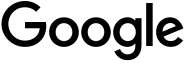
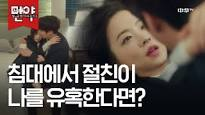
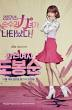
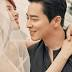

In [37]:
result = str(html.text)
print(result)

In [38]:
import re
from html import unescape

In [41]:
result = re.findall(r'\B<div class="r"><a href="(.+?)" .+b<h3 .+?>(.+?)</h3>', unescape(html.text))

[{"title":row[1], "url":row[0]} for row in result]

[]

# 셀프정리) findall과 find_all()
##findall은 정규식에서 사용하는 표현
###find_all은 DOM에서 계층 표현시 find(), find_parent(), find_parents() 등 하면서 사용하는듯

In [40]:
print(reg)

[]


# 네이버에서 검색해서 뉴스 가져오기

In [32]:
html = download("get", "https://search.naver.com/search.naver", 
                param = {
                        "sm": "top_hty",
                        "fbm": 1,
                        "ie": "utf8",
                        "query": "박보영"
                }
                )

In [35]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="박보영 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'박보영\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'박보영\'의 네이버 통합검색 결과입니다."> <title>박보영 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css" href="h

In [33]:
result = re.findall(r'  <dl> <dt><a href="(.+?)" target=".+?" class=".+?" onclick=".+?" title=".+?"><strong class=".+?">.+?</strong>.+?</a></dt> <dd class=".+?">', unescape(html.text))

In [34]:
result

[]

## unescape와 escape
### -  파이썬(객체)로 만들었어도 통신을 할 경우에는 바이트로 전달이 되어야 한다. 이 과정에서 한글 같은 유니코드는 깨질 수도 있다.
### * escape: 한글-> 이진수로 변환하는 경우 사용
### * unescape:이진수-> 한글로 변환하는 경우에 사용한다.